In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import gc
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from copy import deepcopy
from random import shuffle
from scipy.stats import spearmanr

from access_biology_data import lincs, properties
from access_science_shared import standardizer

sys.path.append('./../src/')
from aging_tools import inout, export

from access_biology_data import annotation
from access_biology_data import meta

In [4]:
outfolder = '211015_across_tissues'
infolder = '200611_manually_curated_overview_of_tissues'

In [5]:
save_images = True

In [6]:
p = inout.get_internal_path(
    'dynamic/tstoeger/{}/models_pan_tissue.xlsx'.format(infolder))

In [7]:
df_m = pd.read_excel(p, skipfooter=10)
df_m = df_m.sort_values('Tissue')
df_m = df_m.set_index('Tissue')

In [8]:
df_m = df_m.drop(columns=['Rat - Yu et al.'])

In [9]:
df_c = df_m.copy()
f = df_c=='+'
df_c[f] = 1

f = df_c=='-'
df_c[f] = -1

f = df_c=='~'
df_c[f] = 0

is_null = df_c.isnull()

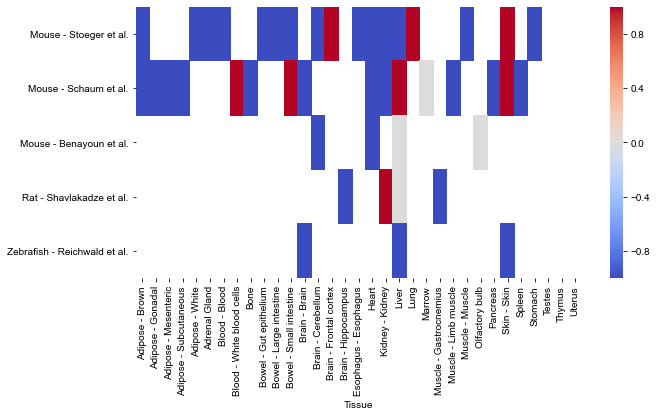

In [10]:
plt.figure(figsize=(10, 5))

sns.heatmap(
    df_c.fillna(0).transpose(), 
    cmap='coolwarm',
    mask=is_null.transpose(),
    xticklabels=True,
    yticklabels=True)

if save_images:
    export.export_image(
        '{}/direction_model_organisms.pdf'.format(
            outfolder))

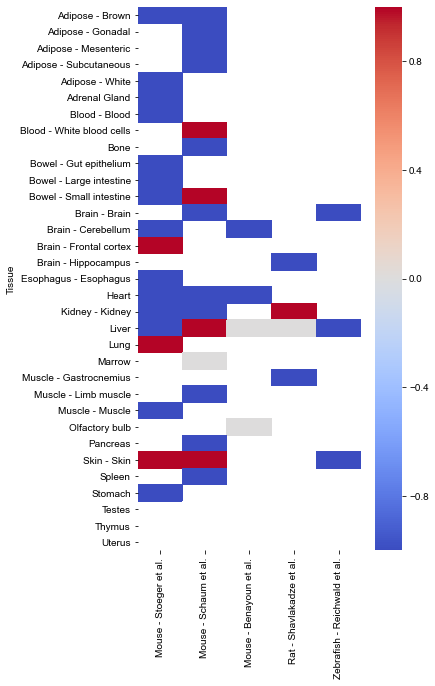

In [11]:
plt.figure(figsize=(5, 10))
sns.heatmap(
    df_c.fillna(0), 
    cmap='coolwarm',
    mask=is_null, 
    xticklabels=True,
    yticklabels=True)

if save_images:
    export.export_image(
        '{}/direction_model_organisms_portrait.pdf'.format(
            outfolder))

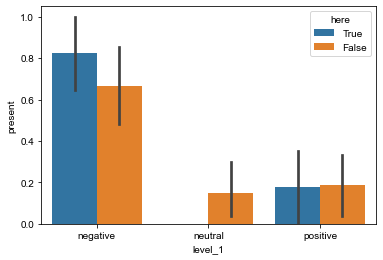

In [12]:
toy = df_c.stack().to_frame('sign').reset_index().rename(columns={'level_1': 'study'})

toy.loc[:, 'negative'] = toy['sign']==-1
toy.loc[:, 'positive'] = toy['sign']==+1
toy.loc[:, 'neutral'] = toy['sign']==0

toy['here'] = toy['study'] == 'Mouse - Stoeger et al.'

toy = toy[['here', 'negative', 'positive', 'neutral']].set_index(
    'here').stack().to_frame('present').reset_index()

sns.barplot(x='level_1', y='present', hue='here', data=toy, 
            hue_order=[True, False],
            order=['negative', 'neutral', 'positive']
           )

if save_images:
    export.export_image(
        '{}/fraction_of_cases_own_study_is_here.pdf'.format(
            outfolder))

In [13]:
toy.groupby(['level_1', 'here']).sum()

present
level_1  here          
negative False     18.0
         True      14.0
neutral  False      4.0
         True       0.0
positive False      5.0
         True       3.0

In [14]:
p = inout.get_internal_path(
    'dynamic/tstoeger/{}/female_and_male_gtex.xlsx'.format(infolder))

In [15]:
df_h = pd.read_excel(p, skipfooter=3)
df_h = df_h.sort_values('Tissue')
df_h = df_h.set_index('Tissue')

In [16]:
tot = pd.merge(df_m.reset_index(), df_h.reset_index(), how='outer')

In [17]:
tot = tot.set_index('Tissue')

In [18]:
tot = tot.sort_index()

In [19]:
df_c = tot.copy()
f = df_c=='+'
df_c[f] = 1

f = df_c=='-'
df_c[f] = -1

f = df_c=='~'
df_c[f] = 0

is_null = df_c.isnull()

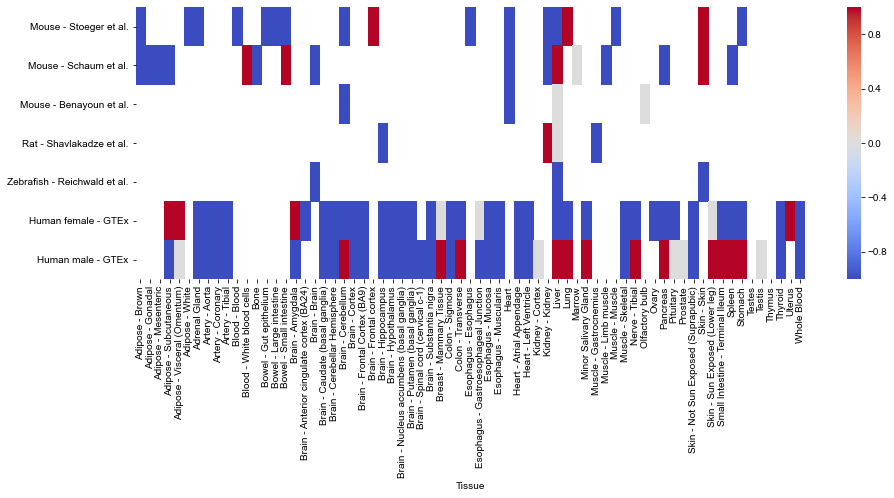

In [20]:
plt.figure(figsize=(15, 5))

sns.heatmap(
    df_c.fillna(0).transpose(), 
    cmap='coolwarm',
    mask=is_null.transpose(), 
    xticklabels=True,
    yticklabels=True)

if save_images:
    export.export_image(
        '{}/direction_with_human.pdf'.format(
            outfolder))

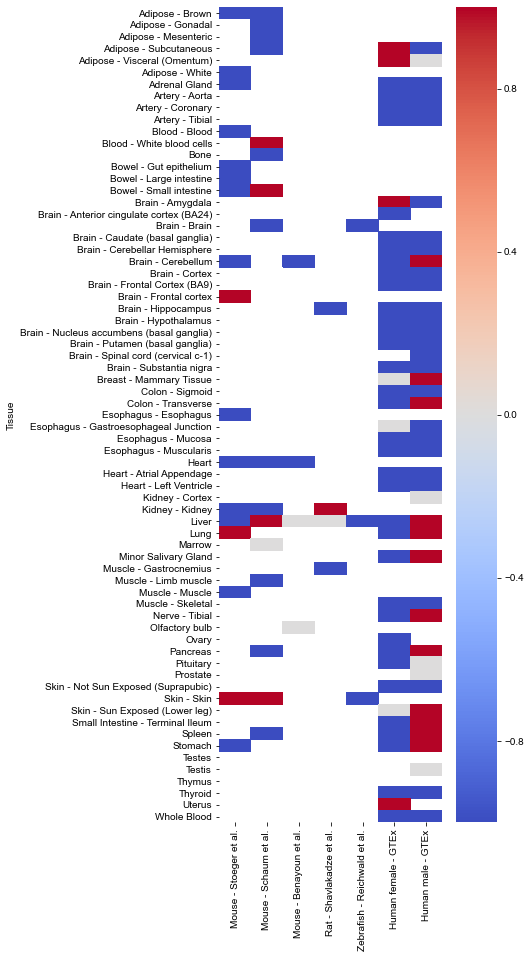

In [21]:
plt.figure(figsize=(5, 15))

sns.heatmap(
    df_c.fillna(0), 
    cmap='coolwarm',
    mask=is_null, 
    xticklabels=True,
    yticklabels=True)

if save_images:
    export.export_image(
        '{}/direction_with_human_portrait.pdf'.format(
            outfolder))

In [22]:
df_c

,Mouse - Stoeger et al.,Mouse - Schaum et al.,Mouse - Benayoun et al.,Rat - Shavlakadze et al.,Zebrafish - Reichwald et al.,Human female - GTEx,Human male - GTEx
Tissue,,,,,,,
Adipose - Brown,-1,-1,NaN,NaN,NaN,NaN,NaN
Adipose - Gonadal,NaN,-1,NaN,NaN,NaN,NaN,NaN
Adipose - Mesenteric,NaN,-1,NaN,NaN,NaN,NaN,NaN
Adipose - Subcutaneous,NaN,-1,NaN,NaN,NaN,1,-1
Adipose - Visceral (Omentum),NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...
Testis,NaN,NaN,NaN,NaN,NaN,NaN,0
Thymus,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thyroid,NaN,NaN,NaN,NaN,NaN,-1,-1


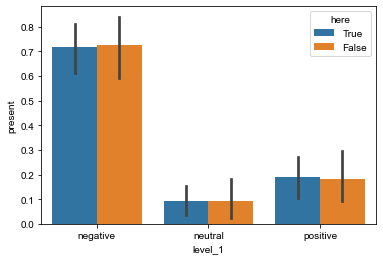

In [23]:
toy = df_c.stack().to_frame('sign').reset_index().rename(columns={'level_1': 'study'})

toy.loc[:, 'negative'] = toy['sign']==-1
toy.loc[:, 'positive'] = toy['sign']==+1
toy.loc[:, 'neutral'] = toy['sign']==0

toy['here'] = toy['study'].str.contains('GTEx')

toy = toy[['here', 'negative', 'positive', 'neutral']].set_index(
    'here').stack().to_frame('present').reset_index()

sns.barplot(x='level_1', y='present', hue='here', data=toy, 
            hue_order=[True, False],
            order=['negative', 'neutral', 'positive']
           )



if save_images:
    export.export_image(
        '{}/fraction_of_cases_human_is_here.pdf'.format(
            outfolder))

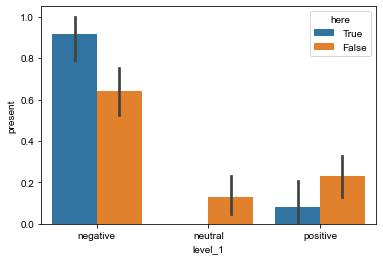

In [24]:
toy = df_c[['Human female - GTEx', 'Human male - GTEx']].dropna(how='all').stack(
    ).to_frame('sign').reset_index().rename(columns={'level_1': 'study'})

toy.loc[:, 'negative'] = toy['sign']==-1
toy.loc[:, 'positive'] = toy['sign']==+1
toy.loc[:, 'neutral'] = toy['sign']==0

toy['here'] = toy['Tissue'].str.contains('Brain')

toy = toy[['here', 'negative', 'positive', 'neutral']].set_index(
    'here').stack().to_frame('present').reset_index()

sns.barplot(x='level_1', y='present', hue='here', data=toy, 
            hue_order=[True, False],
            order=['negative', 'neutral', 'positive']
           )



if save_images:
    export.export_image(
        '{}/gtex_brain_vs_others.pdf'.format(
            outfolder))

In [25]:
toy = df_c.stack().to_frame('sign').reset_index().rename(columns={'level_1': 'study'})

toy.loc[:, 'negative'] = toy['sign']==-1
toy.loc[:, 'positive'] = toy['sign']==+1
toy.loc[:, 'neutral'] = toy['sign']==0

In [26]:
f = toy['study'].str.contains('GTEx')
a = toy.loc[f, :].copy()
a.loc[:, 'flavor'] = 'GTEx - all'

f = (toy['Tissue'].str.contains('Brain')) & toy['study'].str.contains('GTEx')
b = toy.loc[f, :].copy()
b.loc[:, 'flavor'] = 'GTEx - Brain'

f = ~toy['study'].str.contains('GTEx')
c = toy.loc[f, :].copy()
c.loc[f, 'flavor'] = 'animals'

In [27]:
toy = pd.concat([a, b, c])

In [28]:
# f = (toy['Tissue'].str.contains('Brain')) & toy['study'].str.contains('GTEx')
# toy.loc[f, 'flavor'] = 'GTEx - Brain'

# f = ~(toy['Tissue'].str.contains('Brain')) & toy['study'].str.contains('GTEx')
# toy.loc[f, 'flavor'] = 'GTEx - non brain'

# f = ~toy['study'].str.contains('GTEx')
# toy.loc[f, 'flavor'] = 'animals'

In [29]:
toy = toy[['flavor', 'negative', 'positive', 'neutral']].set_index(
    'flavor').stack().to_frame('present').reset_index()





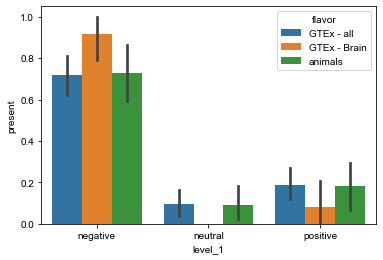

In [30]:
sns.barplot(x='level_1', y='present', hue='flavor', data=toy, 
            hue_order=['GTEx - all', 'GTEx - Brain', 'animals'],
            order=['negative', 'neutral', 'positive']
           )


if save_images:
    export.export_image(
        '{}/gtex_brain_vs_others_vs_animals.pdf'.format(
            outfolder))

In [31]:
toy.groupby(['level_1', 'flavor']).sum()

present
level_1  flavor               
negative GTEx - Brain     22.0
         GTEx - all       61.0
         animals          32.0
neutral  GTEx - Brain      0.0
         GTEx - all        8.0
         animals           4.0
positive GTEx - Brain      2.0
         GTEx - all       16.0
         animals           8.0

In [32]:
toy.groupby(['level_1', 'flavor']).mean()

present
level_1  flavor                
negative GTEx - Brain  0.916667
         GTEx - all    0.717647
         animals       0.727273
neutral  GTEx - Brain  0.000000
         GTEx - all    0.094118
         animals       0.090909
positive GTEx - Brain  0.083333
         GTEx - all    0.188235
         animals       0.181818